In [38]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon,LineString,Point
import fiona

# 진행상황
from IPython.display import display

# 경고제어
import warnings
warnings.filterwarnings('ignore')

# 폰트
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'

In [29]:
df=gpd.read_file('SBJ_2012_002/13.용인시_행정경계(읍면동).geojson')
df.head()

,BASE_DATE,ADM_DR_CD,ADM_DR_NM,geometry
0,20190630,3119111,포곡읍,"MULTIPOLYGON (((127.20460 37.32541, 127.20518 ..."
1,20190630,3119112,모현읍,"MULTIPOLYGON (((127.23872 37.35927, 127.23869 ..."
2,20190630,3119132,남사면,"MULTIPOLYGON (((127.17906 37.18561, 127.17996 ..."
3,20190630,3119113,이동읍,"MULTIPOLYGON (((127.15698 37.22781, 127.15766 ..."
4,20190630,3119134,원삼면,"MULTIPOLYGON (((127.33855 37.18016, 127.33850 ..."


In [30]:
store=pd.read_csv('SBJ_2012_002/1.용인시_상권_정보.csv')
store.head()

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도
0,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로139번길 6-5,127.096851,37.324611
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.102347,37.324553
2,Q,Q01,Q01A01,I56111,한식 음식점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 8,127.128573,37.272405
3,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146151000,중앙동,경기도 용인시 처인구 금령로71번길 2,127.204204,37.235371
4,Q,Q10,Q10A01,I56111,한식 음식점업,4146359000,보정동,경기도 용인시 기흥구 죽전로 50,127.114245,37.320282


In [31]:
store['geometry'] = store.apply(lambda row : Point([row['경도'], row['위도']]), axis=1)
store=gpd.GeoDataFrame(store, geometry='geometry')
store.head()

,대분류코드,중분류코드,소분류코드,표준산업분류코드,표준산업분류명,행정동코드,행정동명,도로명주소,경도,위도,geometry
0,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로139번길 6-5,127.096851,37.324611,POINT (127.09685 37.32461)
1,Q,Q01,Q01A08,I56111,한식 음식점업,4146551000,풍덕천1동,경기도 용인시 수지구 풍덕천로190번길 23,127.102347,37.324553,POINT (127.10235 37.32455)
2,Q,Q01,Q01A01,I56111,한식 음식점업,4146352000,구갈동,경기도 용인시 기흥구 갈곡로7번길 8,127.128573,37.272405,POINT (127.12857 37.27241)
3,Q,Q09,Q09A10,I56211,일반유흥 주점업,4146151000,중앙동,경기도 용인시 처인구 금령로71번길 2,127.204204,37.235371,POINT (127.20420 37.23537)
4,Q,Q10,Q10A01,I56111,한식 음식점업,4146359000,보정동,경기도 용인시 기흥구 죽전로 50,127.114245,37.320282,POINT (127.11424 37.32028)


In [32]:
print(store.crs)
print(df.crs)

None
epsg:4326


In [33]:
store.crs={'init':'epsg:4326'}

분류명 따라 나누고 비춰보기   
색깔 다시 봐보기

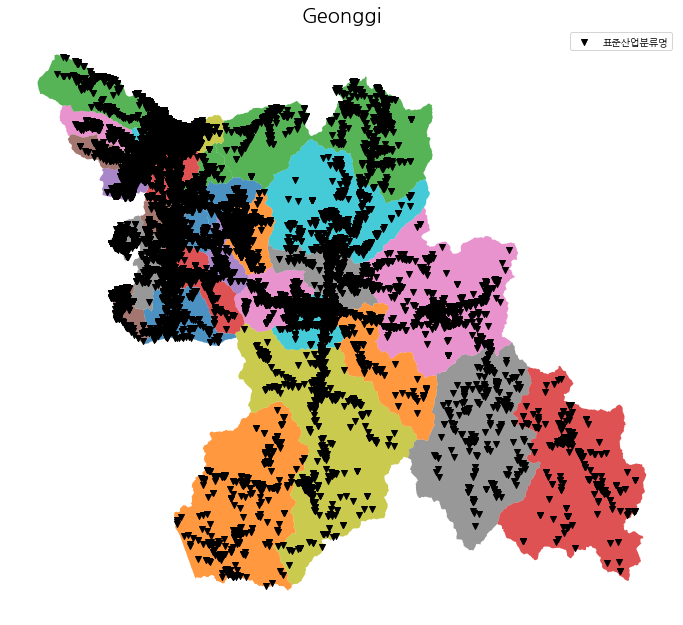

In [39]:
ax = df.plot(figsize=(12,12), alpha=0.8,column='ADM_DR_NM')
store.plot(ax=ax, marker='v', color='black', label='표준산업분류명')
ax.set_title("Geonggi", fontsize=20)
ax.set_axis_off()

plt.legend()
plt.show()